<a href="https://colab.research.google.com/github/salmakhaled5/Cats-vs-Dogs-classification/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-09-28 13:22:43--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.53.113.11, 2600:1407:2800:388::317f, 2600:1407:2800:391::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.53.113.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   135MB/s    in 6.0s    

2022-09-28 13:22:49 (131 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import load_img
import os
import tqdm
import random

In [5]:
input_path = []
label = []

for clas in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+ clas):
    if clas == "Cat":
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", clas, path))

In [6]:
print(input_path[0], label[0])

PetImages/Cat/10283.jpg 0


In [7]:
len(label)

25002

In [8]:
df = pd.DataFrame()
df["image"] = input_path
df["label"] = label

In [9]:
df.head()

image  label
0  PetImages/Cat/10283.jpg      0
1   PetImages/Cat/9842.jpg      0
2  PetImages/Cat/10264.jpg      0
3  PetImages/Cat/11255.jpg      0
4   PetImages/Cat/9071.jpg      0

In [10]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

image  label
0   PetImages/Dog/2454.jpg      1
1   PetImages/Dog/3786.jpg      1
2  PetImages/Cat/12201.jpg      0
3  PetImages/Dog/12369.jpg      1
4   PetImages/Cat/3711.jpg      0

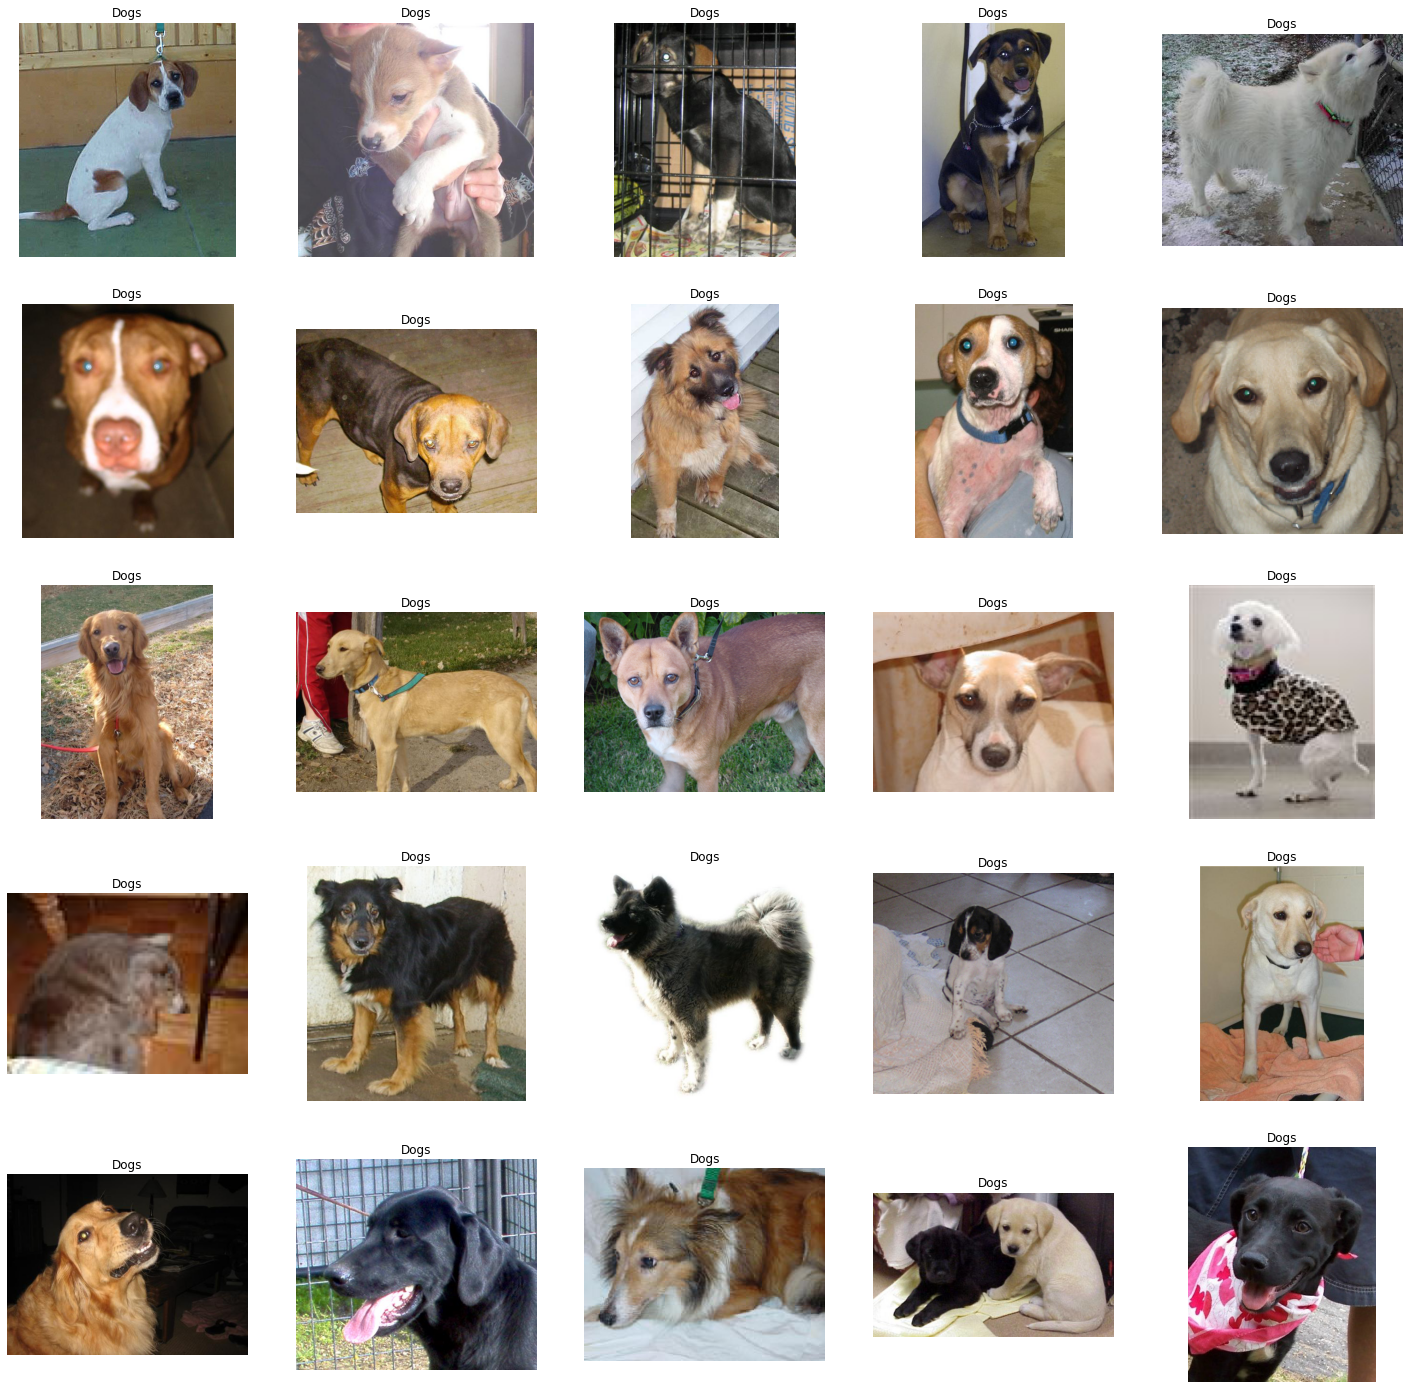

In [11]:
plt.figure(figsize=(25,25))
temp = df[df["label"] == 1]["image"]
start = random.randint(0,len(temp))
files = temp[start:start + 25]
for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Dogs")
  plt.axis("off")

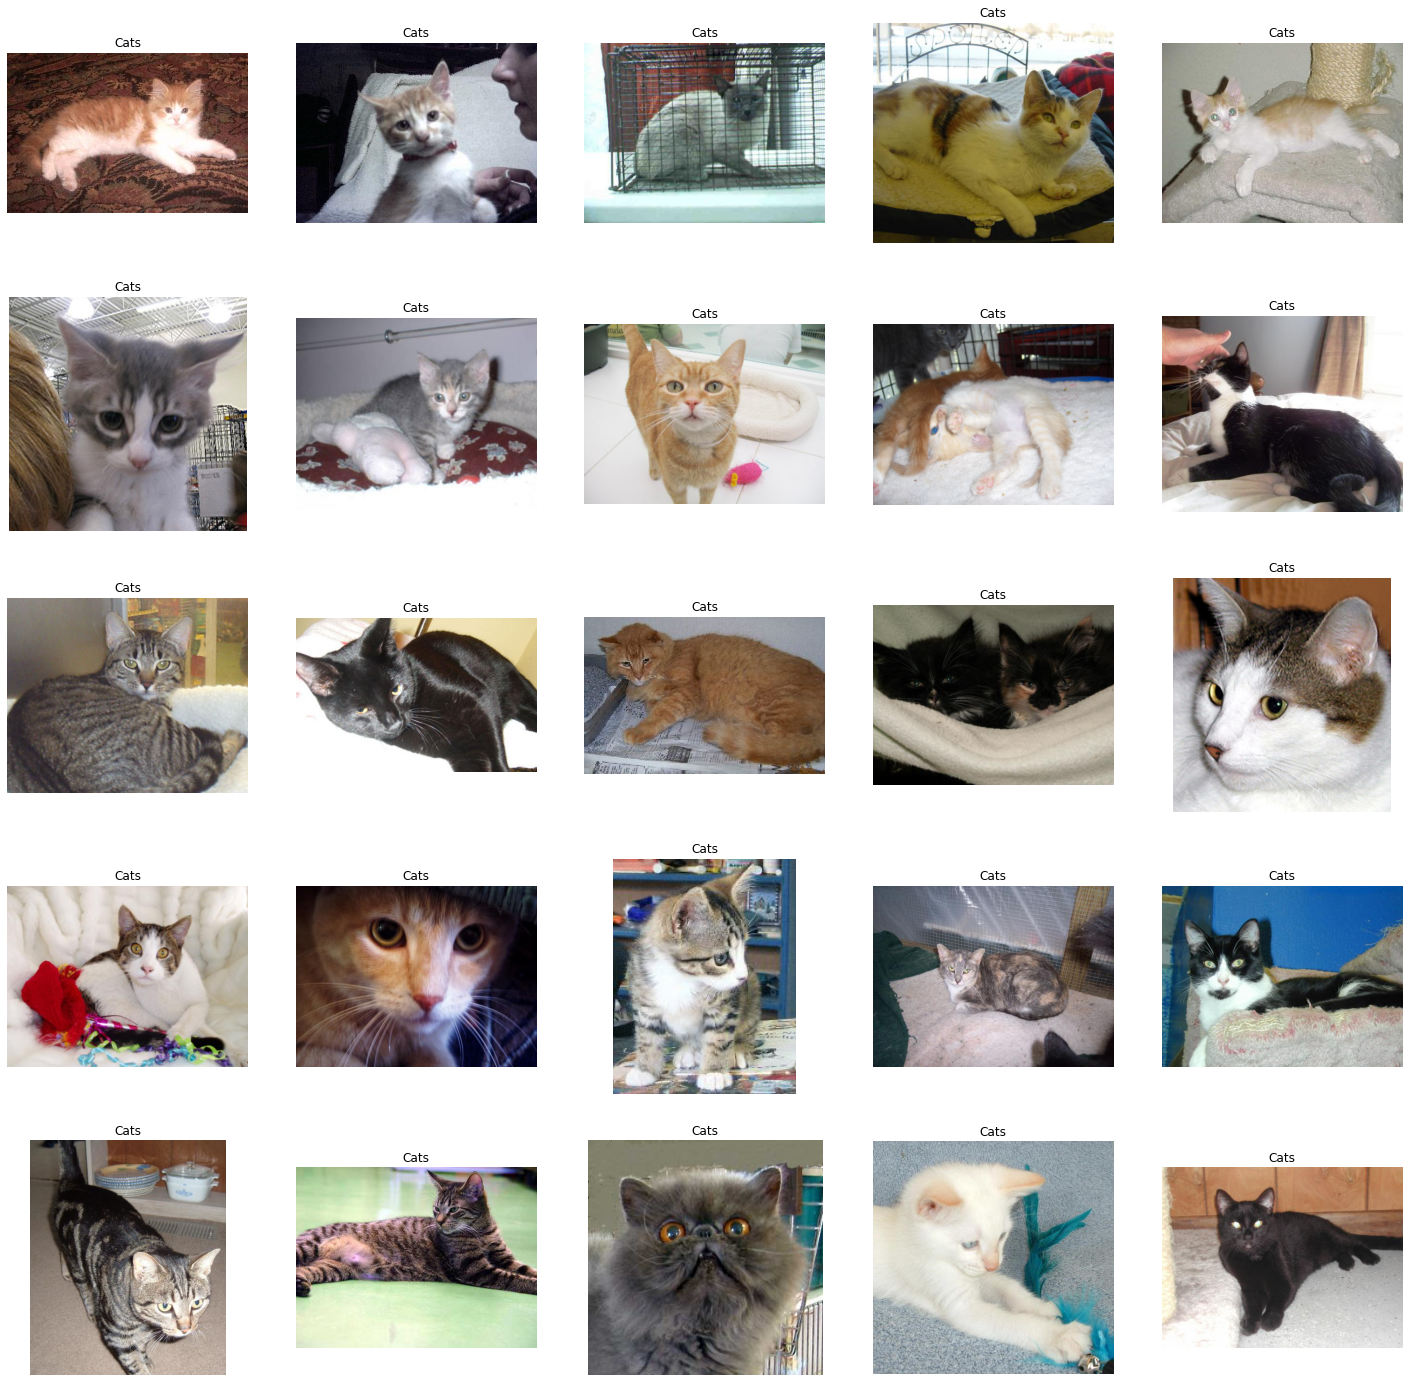

In [12]:
plt.figure(figsize=(25,25))
temp = df[df["label"] == 0]["image"]
start = random.randint(0,len(temp))
files = temp[start:start + 25]
for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Cats")
  plt.axis("off")

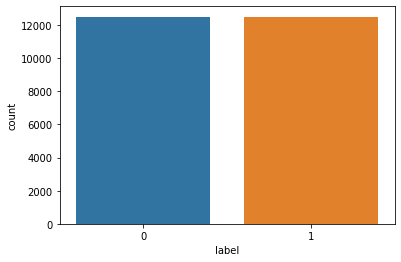

In [13]:
import seaborn as sns
sns.countplot(df["label"])

In [14]:
df['label'] = df['label'].astype('str')

In [15]:
for i in df['image']:
  if '.jpg' not in i:
    print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [16]:
import PIL
l = []
for image in df['image']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg']

In [17]:
df = df[df['image'] != 'PetImages/Cat/Thumbs.db']
df = df[df['image'] != 'PetImages/Dog/Thumbs.db']
df = df[df['image'] != 'PetImages/Cat/666.jpg']
df = df[df['image'] != 'PetImages/Dog/11702.jpg']

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

**Data augmentation**

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        train,
        x_col = 'image',
        y_col = 'label', 
        target_size=(256,256),  
        batch_size=64,
        class_mode='binary'
        )

val_generator = val_datagen.flow_from_dataframe(
        test,
        x_col = 'image',
        y_col = 'label', 
        target_size=(256,256),  
        batch_size=64,
        class_mode='binary'
        )

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


### **Model** **Creation**

In [21]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [22]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [23]:
history = model.fit(
      train_generator,  
      epochs=20,
      validation_data=val_generator,  
      )

Epoch 1/20
313/313 [==============================] - 351s 1s/step - loss: 0.6882 - accuracy: 0.5470 - val_loss: 0.6748 - val_accuracy: 0.5672
Epoch 2/20
313/313 [==============================] - 326s 1s/step - loss: 0.6389 - accuracy: 0.6356 - val_loss: 0.6019 - val_accuracy: 0.6722
Epoch 3/20
313/313 [==============================] - 332s 1s/step - loss: 0.5724 - accuracy: 0.7008 - val_loss: 0.5053 - val_accuracy: 0.7574
Epoch 4/20
313/313 [==============================] - 326s 1s/step - loss: 0.5322 - accuracy: 0.7300 - val_loss: 0.4593 - val_accuracy: 0.7842
Epoch 5/20
313/313 [==============================] - 328s 1s/step - loss: 0.4998 - accuracy: 0.7539 - val_loss: 0.4401 - val_accuracy: 0.8006
Epoch 6/20
313/313 [==============================] - 325s 1s/step - loss: 0.4726 - accuracy: 0.7724 - val_loss: 0.4111 - val_accuracy: 0.8160
Epoch 7/20
313/313 [==============================] - 338s 1s/step - loss: 0.4465 - accuracy: 0.7923 - val_loss: 0.3820 - val_accuracy: 0.8306

**Visualization of Results**

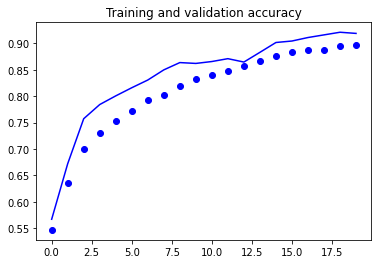

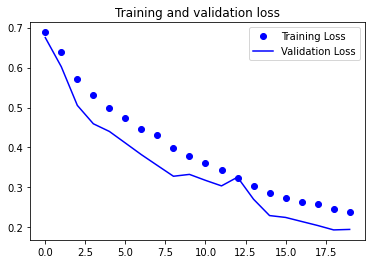

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()